# Exercise 5

Authors: SAMPLE SOLUTIONS

## Task 1: Pandas and seaborn

In this exercise, you will familiarize yourself with the modules pandas and seaborn.

### What are pandas and seaborn?

Pandas is a python library, which is used for working with data sets. It has many functions that make manipulating and analyzing data easier.

Seaborn is a python library based on matplotlib. It allows you to easily create good-looking graphs and visualizations.

### Dataset

The dataset we are analyzing is called '[University students by year, ISCED field, sex and level of study](https://www.bfs.admin.ch/bfs/en/home/statistics/catalogues-databases/data.assetdetail.21884445.html)' and comes from the Bundesamt für Statistik. We provided you with a file called `student_data.csv`, which contains the data for the last ten years.

### Solving this task

Work thorugh this google colab, making sure to run each code panel before moving on to the next. Read the descriptions carefully and fill in where there's a #TODO.

In [1]:
""" Run this import statement once, so that you have all the packages available to you. """

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### 1.1 Read in the data

Read in the data, creating a pandas data frame.

You can use data_frame.head() to print the first few lines and see what the data structure looks like.

In [2]:
df = pd.read_csv('student_data.csv', sep=";")
print(df.head())

      Year                                      ISCED Field     Sex  Bachelor  \
0  2012/13                                Education science    Male       115   
1  2012/13                                Education science  Female       584   
2  2012/13  Teacher training without subject specialisation    Male       144   
3  2012/13  Teacher training without subject specialisation  Female       688   
4  2012/13     Teacher training with subject specialisation    Male       771   

   Master  Doctorate  
0      89        103  
1     380        220  
2      61         12  
3     483         31  
4     356         23  


### 1.2 Students by level of study

Now we will have a look at the data. 

1. How many Bachelor's, Master's and Doctorate students were there each year (across all subjects)? You can use the pandas function '[groupby](https://www.geeksforgeeks.org/pandas-groupby/)' to do this.
2. Visualize this data using a [seaborn lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html), so that you can see how the student numbers changed over the years.

      Year  Bachelor  Master  Doctorate
0  2012/13     69774   34221      22643
1  2013/14     70562   36571      23177
2  2014/15     70682   38260      23652
3  2015/16     71546   39154      24364
4  2016/17     72593   40116      24796
5  2017/18     73493   41301      25165
6  2018/19     74190   42410      25423
7  2019/20     75303   43989      25911
8  2020/21     79296   46642      26601
9  2021/22     79445   48914      27211


<AxesSubplot:xlabel='Year'>

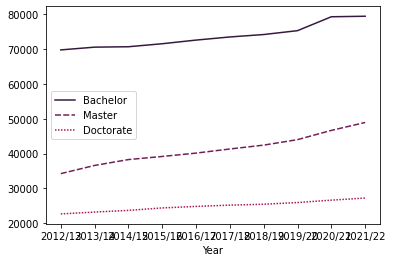

In [3]:
#SOLUTIONS
""" How many Bachelor's, Master's and Doctorate students were there each year, regardless of subject? """

data = df.groupby(by='Year', as_index=False).sum()
print(data)

data = data.set_index("Year")

"""" Plot this data in a line plot using seaborn. """
sns.set_palette("rocket")

sns.lineplot(data=data)

### 1.3 Students of Year 2021/22

Now we only want to look at the students from the year 2021/22.
1. Make a new table only containing the students of year 2021/22.
2. Add a column called 'sum', containing the sum of all Bachelor, Master and Doctorate students for each subject respectively.
3. Make a [bar plot](https://seaborn.pydata.org/generated/seaborn.barplot.html) using seaborn, so that you can compare the different subjects in terms of student numbers. Which subject had the most students? Which one the fewest?

<ipython-input-4-a492b9efa9ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Sum"] = data[['Bachelor', 'Master', 'Doctorate']].sum(axis=1)


<AxesSubplot:xlabel='ISCED Field', ylabel='Sum'>

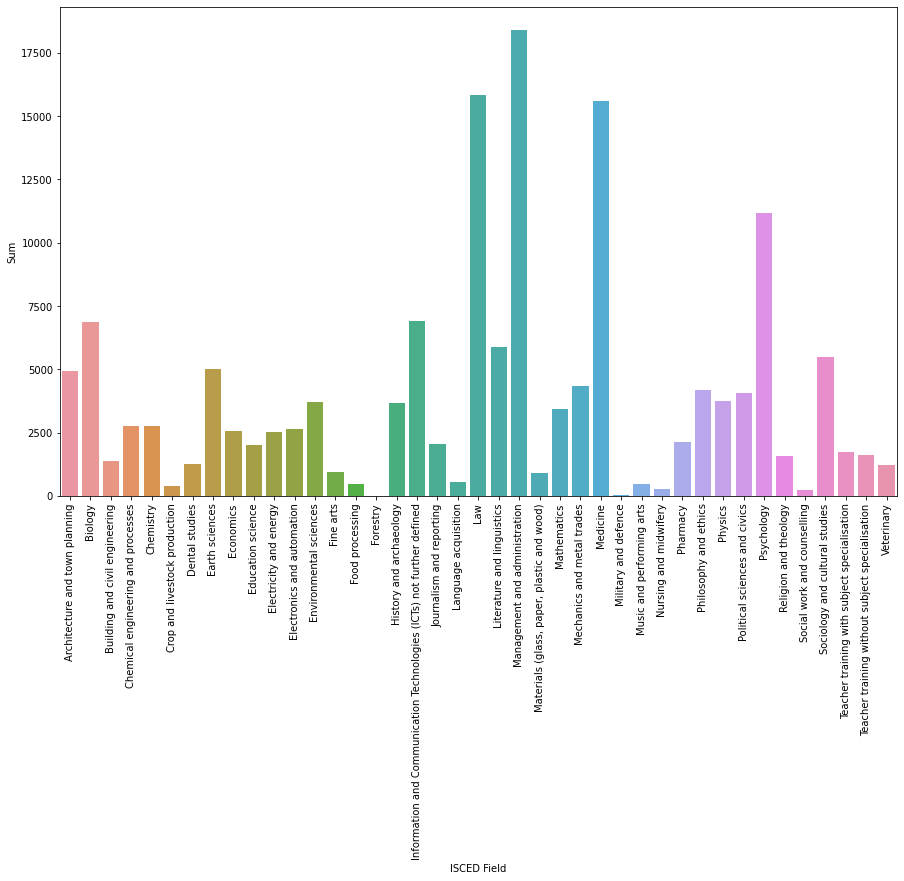

In [4]:
#SOLUTIONS
data = df.loc[df['Year'] == '2021/22']
data["Sum"] = data[['Bachelor', 'Master', 'Doctorate']].sum(axis=1)

data = data.groupby(by='ISCED Field', as_index=False).sum()

f, ax = plt.subplots(figsize=(15, 9))
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
sns.barplot(data=data, x='ISCED Field', y="Sum")

# Most Students: Management and Administration
# Fewest Students: Forestry


### 1.4 Gender distribution

1. The data set also includes data on the legal gender/sex of the students. Select five different subjects, and plot them in a way so you can compare the development over the years. You can be creative with it: You can compare the absolute numbers, compare the gender ratio and/or compare the different subjects to each other.
2. What is something interesting you've discovered by visualizing the data this way? Did it help you to better understand the data?
3. A very cool feature of seaborn are the ways in which you can customize the [look of your plots](http://seaborn.pydata.org/tutorial/aesthetics.html). Try out some different colors and styles on your plots. :)




        Year  ISCED Field     Sex  Bachelor  Master  Doctorate   Sum
35   2012/13      Biology  Female      1753     612       1310  3675
39   2012/13    Chemistry  Female       350     173        350   873
43   2012/13      Physics  Female       250      94        188   532
45   2012/13  Mathematics  Female       414     203         86   703
77   2012/13     Pharmacy  Female       736     313        156  1205
..       ...          ...     ...       ...     ...        ...   ...
772  2021/22      Biology    Male      1233     614        999  2846
776  2021/22    Chemistry    Male       606     298        747  1651
780  2021/22      Physics    Male      1360     658        845  2863
782  2021/22  Mathematics    Male      1306     877        286  2469
814  2021/22     Pharmacy    Male       342     171         99   612

[100 rows x 7 columns]


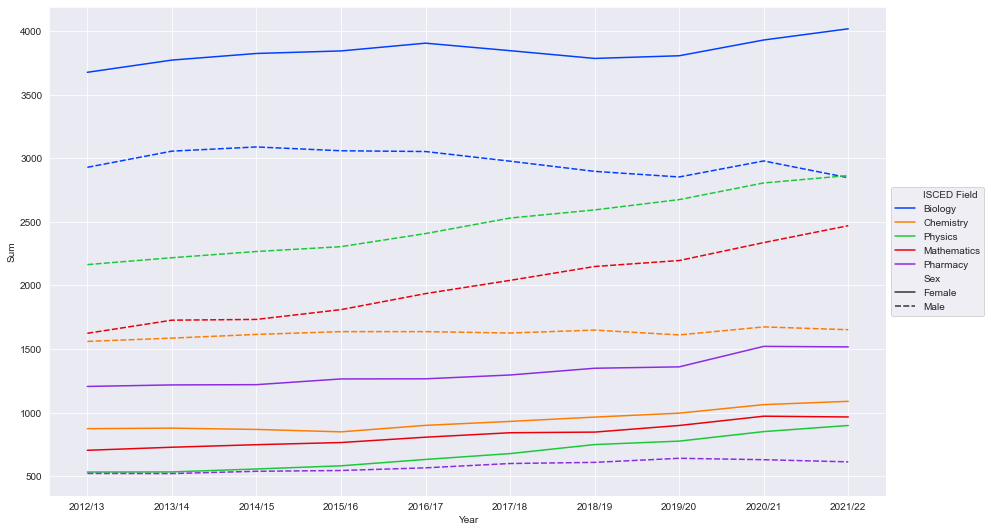

In [5]:
# SOLUION IDEA
data = df
data["Sum"] = data[['Bachelor', 'Master', 'Doctorate']].sum(axis=1)

data_female = df.loc[df['Sex'] == 'Female']
data_male = df.loc[df['Sex'] == 'Male']

new_data = pd.concat([data_female, data_male])

new_data = new_data.loc[df['ISCED Field'].isin(['Physics', 'Biology', 'Pharmacy', 'Chemistry', 'Mathematics'])]
print(new_data)

""" Comparing ratios """

sns.set_style("darkgrid")
sns.set_palette("bright")
f, ax = plt.subplots(figsize=(15, 9))
locs, labels = plt.xticks()
plot = sns.lineplot(data=new_data, x="Year", y="Sum", hue="ISCED Field", style="Sex")
plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Task 2: Writing a README

A good README or documentation is key to your program or package being used properly or being used at all. But as you know, some documentations are a pain to work through. There are some conventional guidelines you can follow, to ensure that your documentation is as precise and short as possible.

In this last task, you will practise writing a README within a given maximum number of sentences. Have a look at the code in the cell below. Try to run it and understand how it works. Once you grasped the idea and workings of the code, write a README following the given structure.

In [ ]:
#!/usr/bin/env python3

# Author: Giovanna Gelata



class Gelateria:

	food_type = 'ice cream'

	def __init__(self, name: str, location: str):
		self.name = name
		self.location = location
		self._flavours = list()
		self._price = 1.00
		self._order_number = 1


	def add_flavours(self, flavours):
		if type(flavours) == str:
			if flavours in self._flavours:
				print(f'Flavour "{flavours}" is already in the system.')
			else:
				self._flavours.append(flavours)
		elif type(flavours) == list:
			for flavour in flavours:
				if flavour in self._flavours:
					print(f'Flavour "{flavour}" is already in the system.')
				else:
					self._flavours.append(flavour)


	def _calculate_price(self, number_of_scoops: int):
		return number_of_scoops * self._price


	def take_order(self):
		order = dict()
		count_ice = 0
		price = 0
		print()
		print('-'*15)
		print(f'Order {self._order_number}')
		print('-'*15)
		print('Your order:')
		add_more = None

		while add_more != 'q':
			count_ice += 1
			flavours = input('Flavours separated by commas: * ').split(",")
			# print(flavours)
			for flav in flavours:
				flav_clean = flav.strip()
				if flav_clean not in self._flavours:
					print(f'Sadly, flavour \'{flav}\' is not available.')
					del flavours[flavours.index(flav)]
					continue
			amounts = input('Amounts separated by commas: * ').split(",")
			order[count_ice] = {i: j for i, j in zip(flavours, amounts)}
			add_more = input('To add more, press enter. If you\'re finished, press \'q\'. ')

		for order_no, it in order.items():
			for k, v in it.items():
				price += self._calculate_price(float(v))

		print(f'Price: {price}0 €')
		print('Thank you for your order!')

		self._order_number += 1


	def __repr__(self):
		string = '\n'
		string += f'Welcome to the gelateria {self.name} from {self.location}!\n'
		string += f'We are happy to serve you. Our hand-made ice cream is made from an original family recipe.\n'
		string += 'We offer the following flavours of ice cream for you to enjoy: \n'
		if self._flavours:
			for flav in self._flavours:
				string += f'\t* {flav.capitalize()}\n'
		else:
			string += '\tUnfortunately, we have no flavours available.\n'
		string += 'We are happy to serve you!\n'
		return string


Please write your answers in the text cell below.

### Gelateria-Module

Author: Sample Solutions, sample@solutions.com


This module serves as an interface for ice cream shops. The user can add own, new ice cream flavours, show the menu to customers and take orders.

##### **Installation**

For this module, no other libraries are needed. The user can run the script creating an object for the ice cream shop with the following line. Both, name and location of the shop, need to be given to the object. For example, 

```python
annas_gelato = Gelateria("Anna's Gelato", "Milano")
```

**List of requirements:**
* None

##### **Functionalities**

This module is a helpful tool for running an ice cream shop. Once an object has been instantiated, the user can do following things:

```python
annas_gelato.add_flavours(['chocolate', 'vanilla', 'hazelnut'])
annas_gelato.add_flavours('basil')
```
> The user can add flavours to the shop using either a string for one single flavour or a list containing different flavours. If the flavour already exists, the user will be notified.


```python
annas_gelato.take_order()
```
> This function allows the user to take orders from customers and calculates the final price. Ice cream combinations can be added as wished. To quit the loop, the user can hit 'q'.


```python
print(annas_gelato)
```
> This built-in function serves to give an overview of the current ice cream shop. It will return a string including name, location and available flavours of the shop.


##### **Improvements**

This module is still in its early stages of development. Please feel free to add and implement further functionalities. Two suggestions we have are:

* implementing a 'mystery_flavour' function. It could take an integer and return random flavours of this amount. 
* implement further options to choose from, like cup vs. cone, adding toppings, etc.

## Exam Prep – Task 3: Object Oriented Programming

Note: This is an **optional exercise**, which is similar to something you might encounter in the exam. We will not correct it, but we will give you a sample solution. Feel free to either solve it here or in a seperate .py file.



### Destination Class
You want to go sightseeing in Zurich, but there's so much to do! To help you store all the different landmarks, you decide to create a python class.

In the folder `zurich_sightseeing` you will find five .txt files containing basic information about one destination each. Have a look at the files. You should be able to read them in easily, since they are all structured in the same way.

To instanciate a single destination, you call the class as follows:

```
>>> grossmunster = Destination("zurich_sightseeing\grossmunster")
```

You want to easily be able to look at all the information about the destination, so **printing the object** should just return all the information in the .txt file.

```
>>> print(grossmunster)

Grossmünster
The Grossmünster church is a landmark of Zurich. Legend has it that the church was built on the graves of the city’s patron saints, Felix and Regula.

Distance to Zurich Main Station: 892 m
Open on: Mon Tue Wed Thu Fri Sat Sun
```

When you're planing where to go, you want to be able to compare two destinations on **how far away they are from Zurich Main Station**. You have to be careful, since some distances are in m, others in km.

If you want to know if the Grossmünster is further away from the Main Station than the Kunsthaus, you can check like this:



```
>>> grossmunster > kunsthaus

False
```

When deciding on a day for your trip, it's important to know if the destinations in question are open on the same day! You want to be able to check **if a destination is open on a specific day**, as well as check **what opening days two destinations share with each other**.


```
>>> grossmunster.open_on("Tue")

True

>>> grossmunster.shared_opening_days(photobastei)

Thu Fri Sat Sun

```







In [ ]:
# SAMPLE SOLUTIONS


class Destination:
  """
  A Destination object representing a single sightseeing location.

  self.name: name of the destination
  self.description: short description of the place
  self.distance: distance of the destination from the Zurich Main Station in meters
  self.opening: on what days the destination is open for visits
  """
  def __init__(self, filepath):
    # reading in and processing the data
    with open(filepath, encoding='utf-8') as f:
      self.unprocessed = f.read()

    self.full_data = []
    for line in self.unprocessed.split("\n"):
      if line.strip() != "":
        self.full_data.append(line.strip())

    # assign the different elements to their variable
    self.name = self.full_data[0]
    self.description = self.full_data[1]
    self.distance = self.full_data[2].split(":")[1].split()

    # convert distance to meters
    if self.distance[1] == 'm':
      self.distance = int(self.distance[0])
    elif self.distance[1] == 'km':
      self.distance = int(self.distance[0]) * 1000

    self.opening = self.full_data[3].split(":")[1].split()

  # prints out the original .txt input
  def __repr__(self):
        return self.unprocessed

  # checks if one destination is further from the Main Station than the other
  def __gt__(self, other):
      return self.distance > other.distance

  # checks if one destination is closer to the Main Station than the other
  def __lt__(self, other):
      return self.distance > other.distance

  # checks if destination is open on a specific day
  def open_on(self, day):
      if day in self.opening:
          return True
      else:
          return False

   # returns the days two destinations are both open on
  def shared_opening_days(self, other):
      weekdays = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
      return " ".join(sorted((list(set(self.opening).intersection(other.opening))), key=weekdays.index))


## Exam Prep – Task 4: Encodings



Note: This is an **optional exercise**, which is similar to something you might encounter in the exam. We will not correct it, but we will give you a sample solution. Feel free to either solve it here or in a seperate .py file.

### Calculating Prices For Words

You got a call from a company who would like to hire you, a computational linguist. The company sells many personalizable items such as mugs, clothing or pencils. They offer a wide range of customizability, but recently they got many complaints about names or words that contain non-ASCII characters or are simply too long to fit (sadly, the company is not too progressive, yet, with non-European names). Your job is to write a program that calculates the prices for the items according to length of word(s) and number of non-ASCII characters.

First of all, create a class, which takes any string as input. The string can include non-ASCII characters and emojis. To calculate the final price, you need to calculate the 'length-weight' first. Alter the \_\_len__ method in a way, that it returns your own calculated length, instead of the Python defaulted one. The method should be callable like this:

```
# how it should be
>>> name = Personalize('Ali Smith')
>>> len(name)
8
```

Since printing non-standard characters is more work (according to the printing company), the price of a string varies depending on its characters. Your boss gave you some rules that your program should follow:

* Whitespaces don't count
* ASCII characters count 1 each
* ASCII characters with accents count 1 each
* Emojis count 2 each
* Characters outside the Latin writing system count 3 each

A call of the len-function could look like the following: 
```
# how it should be
>>> name = Personalize('Ali Smith 🌈')
>>> len(name)
10
```
#### Emojis

To calculate the weight of emojis, some further processing is needed. As emojis get more features, single glyphs are not enough anymore. Some emojis require many pieces. The different 'sub-emojis' are connected by the so-called *zero-width* character '\u200d'. If this character is present, you can assume that the whole emoji-string belongs together.

```
# example of Python's default
>>> text = '👰🏾‍♂️'
>>> [char for char in text]
['👰', '🏾', '\u200d', '♂', '️']
>>> text = '🏐💗'
>>> [char for char in t2]
['🏐', '💗']  # as you can see, no zero-with character is used
```

Especially for person emojis, sex and skintone can be modified. By default, Python counts the modifying codepoints and adds them up. For example, one single emoji can have a length of five.

```
# how it should NOT be
>>> text = '👰🏾‍♂️'
>>> len(text)
5
```

Such customizations should not cost extra, since the 'length' of the emoji is not affected – no matter which sex or skintone it has, the emoji is always one glyph. For sex, emojis can have the attribute ♀, ♂ or nothing. The five available skintones are:
* 🏻
* 🏼
* 🏽
* 🏾
* 🏿

None of them should increase the price. Thus, your code should output the following:

```
# how it should be
>>> emoji = Personalize('👰🏾‍♂️')
>>> len(emoji)
2

```

#### Non-Latin Writing Systems

For any character which cannot be encoded in Latin-1, the count should incready by 3. For the exercise, you might want to use the [emoji](https://pypi.org/project/emoji/) module. Especially the attribute EMOJI_DATA could come in very handy. Have a look at its value(s).

#### Calculating
Lastly, write a function that returns a price to the user according to input. Don't forget to add the prices for the items that should be personalizzed. To do so, use the dictionary in the code cell below. The new calculated length is the price in any currency you like. Make a nice interface that returns a type of receipt for the user. All characters should bi enlisted, their prices and the final price.

### Examples
The following examples might help to understand the workings of the functions further.

```
>>> name_jp = Personalize('莉子')
>>> len(name_jp)
6
>>> calculate_price(name_jp, 'mug')
16 CHF

```

```
>>> name_fr = Personalize('')
>>> calculate_price(name_fr)


```

In [ ]:
pricing = {
    'mug': 10,
    't-shirt': 20,
    'notebook': 5,
    'waterbottle': 45,
    'drinking glass': 10,
    'pencil': 3,
    'backpack': 80,
    'cap': 15,
    'flag': 30,
    'ferrari': 400000
}

In [ ]:
# run this cell if needed
! pip3 install emoji

In [ ]:
# SAMPLE SOLUTIONS


import emoji


class Personalize:

	def __init__(self, string: str, item: str):

		self.string = string
		self.item = item
		self.characters = list(self._keep_emojis(self.string))
		self.emojis = emoji.EMOJI_DATA
		self.pricing = {
		    'mug': 10,
		    't-shirt': 20,
		    'notebook': 5,
		    'waterbottle': 45,
		    'drinking glass': 10,
		    'pencil': 3,
		    'backpack': 80,
		    'cap': 15,
		    'flag': 30,
		    'ferrari': 400000
		}
		self.calculated = self.calculate_price()


	def _keep_emojis(self, string: str):

		final = str()
		for char in string:
			if char not in ('🏻','🏼','🏽','🏾','🏿','♂','♀','\u200d', '️'):
				final += char
		return final


	def __len__(self):

		count = 0

		for char in self.characters:
			if char == ' ':
				count += 0
			elif char in self.emojis:
				count += 2
			else:
				try:
					char.encode('latin-1')
					count += 1
				except UnicodeEncodeError:
					count += 3

		return count


	def calculate_price(self):
		if self.item not in self.pricing:
			print('No such item available. Please choose from the following:')
			for i in self.pricing:
				print(f'\t* {i}')
				return None
		else:
			return len(self.string) + self.pricing[self.item]


	def receipt(self):
		print('\t' + ('-'*30))
		print('\tThank you for your purchase.')
		print()
		print(f'\tYou purchased one {self.item} \n\twith the personalization\n\t"{self.string}".')
		print('\t' + ('-'*30))
		print(f'\tTotal:\t\t{self.calculated} CHF')
		print('\t' + ('-'*30))



		return count